The DQ0 (or DQZ) Transform is used in electrical engineering for modeling three-phase voltage and current. Since three-dimensional plots are difficult to visualize and analyze, the DQ0 Transform translates the three-dimensional electrical parameters into a two-dimensional vector space. Although the DQ0 Transform is most commonly used in engineering, it may also be applicable for any situation involving multidimensional harmonic behavior.

First, let's generate a "perfect" three-phase signal:

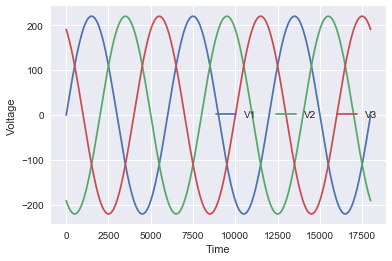

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# User configurable
freq = 1/60
end_time = 180
v_peak = 220
step_size = 0.01
# Find the three-phase voltages
v1 = []
v2 = []
v3 = []
thetas = 2 * np.pi * freq * np.arange(0,end_time,step_size)
for ii, t in enumerate(thetas):
    v1.append(v_peak * np.sin(t))
    v2.append(v_peak * np.sin(t - (2/3)*np.pi))
    v3.append(v_peak * np.sin(t - (4/3)*np.pi))
v1, v2, v3 = np.array(v1), np.array(v2), np.array(v3)
# Plot the results
plt.plot(v1, label="V1")
plt.plot(v2, label="V2")
plt.plot(v3, label="V3")
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend(ncol=3);

The DQ0 Transform will translate the three variables above into two variables, called the "Direct" phase (or "D") and the "Quadrature" phase (or "Q"). Hence, the resulting variables can be plotted on an X-Y graph for simple visualization. The following code implements a DQ0 Transform in Python, which takes all three phases of voltage as an input.

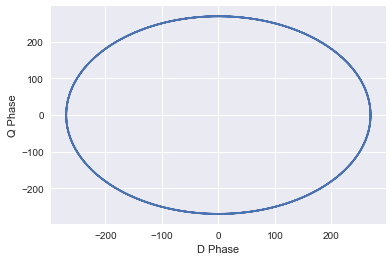

In [4]:
def dq0_transform(v_a, v_b, v_c):
    d=(np.sqrt(2/3)*v_a-(1/(np.sqrt(6)))*v_b-(1/(np.sqrt(6)))*v_c)
    q=((1/(np.sqrt(2)))*v_b-(1/(np.sqrt(2)))*v_c)
    return d, q

# Calculate and plot the results
d, q = dq0_transform(v1, v2, v3)
plt.figure()
plt.plot(d, q)
plt.xlabel('D Phase')
plt.ylabel('Q Phase');

Notice that the figure above makes a perfect circle. Why? Our reference frame is rotating at the exact same "rate" that the AC voltage signals are varying. Instead of looking at a complicated 3-phase system, the same information can be represented in 2 dimensions.